<a href="https://colab.research.google.com/github/nishant18165/Neural-Netwok-MLP-Classifier/blob/main/MLP_Implementation_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import copy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from sklearn.neural_network import MLPClassifier
from sklearn.manifold import TSNE
import pickle
from keras.datasets import mnist
import pandas as pd
import seaborn as sns

In [ ]:
class MyNeuralNetwork():
    """
    My implementation of a Neural Network Classifier.
    """

    acti_fns = ['relu', 'sigmoid', 'linear', 'tanh', 'softmax']
    weight_inits = ['zero', 'random', 'normal']

    def __init__(self, n_layers, layer_sizes, activation, learning_rate, weight_init, batch_size, num_epochs, X_test=None, y_test=None):
        """
        Initializing a new MyNeuralNetwork object

        Parameters
        ----------
        n_layers : int value specifying the number of layers

        layer_sizes : integer array of size n_layers specifying the number of nodes in each layer

        activation : string specifying the activation function to be used
                     possible inputs: relu, sigmoid, linear, tanh

        learning_rate : float value specifying the learning rate to be used

        weight_init : string specifying the weight initialization function to be used
                      possible inputs: zero, random, normal

        batch_size : int value specifying the batch size to be used

        num_epochs : int value specifying the number of epochs to be used
        """

        self.n_layers=n_layers
        self.layer_sizes=layer_sizes
        self.activation=activation
        self.learning_rate=learning_rate
        self.weight_init=weight_init
        self.batch_size=batch_size
        self.num_epochs=num_epochs
        self.weight_initialisation()

        """Initialising X_test and y_test so we can validate for every epochs"""
        self.X_test=X_test
        self.y_test=y_test  

        """Initialising Train and validate/test accuracy matrix so we can store the accuracy and error for every epochs"""
        self.Train_acc=np.zeros(self.num_epochs)
        self.Test_acc=np.zeros(self.num_epochs)

        self.Train_loss=np.zeros(self.num_epochs)
        self.Test_loss=np.zeros(self.num_epochs)

        if activation not in self.acti_fns:
            raise Exception('Incorrect Activation Function')

        if weight_init not in self.weight_inits:
            raise Exception('Incorrect Weight Initialization Function')

    def layer_initialisation(self,size):
      '''initialize the empty layers of corresponding sizes'''
      self.values=[np.empty((size,layer)) for layer in self.layer_sizes]
      self.acts=[np.empty((size,layer)) for layer in self.layer_sizes]

    def weight_initialisation(self):
      '''initializes the weights for every layer with according to sizes'''
      self.weights=[]
      if(self.weight_init=='normal'):
        for i in range(self.n_layers-1):
          w=self.normal_init((self.layer_sizes[i],self.layer_sizes[i+1]))
          self.weights.append(w*0.01)
      elif(self.weight_init=='random'):
        for i in range(self.n_layers-1):
          w=self.random_init((self.layer_sizes[i],self.layer_sizes[i+1]))
          self.weights.append(w*0.01)
          
      elif(self.weight_init=='zero'):
        for i in range(self.n_layers-1):
          self.weights.append(self.zero_init((self.layer_sizes[i],self.layer_sizes[i+1])))
      self.weights=np.asarray(self.weights)
      self.bias=np.zeros(self.n_layers-1)

    def for_Activation(self,Input):
        """A helper function for Forward network"""
        if(self.activation=='sigmoid'):
          return self.sigmoid(Input)
        elif(self.activation=='linear'):
          return self.linear(Input)
        elif(self.activation=='softmax'):
          return self.softmax(Input)
        elif(self.activation=='tanh'):
          return self.tanh(Input)
        elif(self.activation=='relu'):
          return self.relu(Input)
        
     
      
      
    def relu(self, X):
        """
        Calculating the ReLU activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        x_calc=np.where(X<0,0,X)
        return x_calc

    def relu_grad(self, X):
        """
        Calculating the gradient of ReLU activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
       
        x_calc=np.where(X<0,0,1)
        return x_calc

    def sigmoid(self, X):
        """
        Calculating the Sigmoid activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
       
        x_calc=1./(1.+np.exp(-X))
        return x_calc
    
    def sigmoid_grad(self, X):
        """
        Calculating the gradient of Sigmoid activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        h=self.sigmoid(X)
        x_calc=h*(1.-h)
        return x_calc

    def linear(self, X):
        """
        Calculating the Linear activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        
        x_calc=copy.deepcopy(X)
        return x_calc

    def linear_grad(self, X):
        """
        Calculating the gradient of Linear activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        x_calc=np.ones(X.shape)
        return x_calc

    def tanh(self, X):
        """
        Calculating the Tanh activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
      
      
        a=np.exp(X)
        b=np.exp(-X)
        temp1=a+b
        temp2=a-b
        x_calc=temp2/temp1
       

        return x_calc

    def tanh_grad(self, X):
        """
        Calculating the gradient of Tanh activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        x_calc=1.-(self.tanh(X))**2
        return x_calc

    def softmax(self, X):
        """
        Calculating the ReLU activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        
        temp=np.exp(X)
        x_calc=temp/temp.sum(axis=1,keepdims=True)
        return x_calc

    def softmax_grad(self, X):
        """
        Calculating the gradient of Softmax activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array 

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        sum=np.sum(np.exp(X),axis=0)
        diff=sum-np.exp(X)
        x_calc=diff/(s**2)
        return x_calc



    def zero_init(self, shape):
        """
        Calculating the initial weights after Zero Activation for a particular layer

        Parameters
        ----------
        shape : tuple specifying the shape of the layer for which weights have to be generated 

        Returns
        -------
        weight : 1-dimensional numpy array which contains the initial weights for the requested layer
        """
        weight=np.zeros(shape)
        return weight

    def random_init(self, shape):
        """
        Calculating the initial weights after Random Activation for a particular layer

        Parameters
        ----------
        shape : tuple specifying the shape of the layer for which weights have to be generated 

        Returns
        -------
        weight : 1-dimensional numpy array which contains the initial weights for the requested layer
        """
        weight=np.random.randn(shape[0],shape[1])
        return weight

    def normal_init(self, shape):
        """
        Calculating the initial weights after Normal(0,1) Activation for a particular layer

        Parameters
        ----------
        shape : tuple specifying the shape of the layer for which weights have to be generated 

        Returns
        -------
        weight : 1-dimensional numpy array which contains the initial weights for the requested layer
        """
        weight=np.random.normal(size=shape)
        return weight


    

    def cross_entropy(self,y_pred,y):
      '''returns the cross entropy loss'''
      epsilon=1e-16
      y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
      #print(y.shape,y_pred.shape)
      return (-np.log(y_pred)*y).sum(axis=1).mean()

    def Accuracy(self,y_pred,y):
        
       '''calculates accuracy'''
       a=np.argmax(y_pred,axis=1)
       a=np.squeeze(np.eye(10)[a.astype(np.int).reshape(-1)])
       return np.all(a==y,axis=1).mean()


    def forward(self, X):
      '''performs forward propogation step'''
      l_out_act=X
      self.values[0]=l_out_act
      self.acts[0]=l_out_act
      for i in range(self.n_layers-2):
        w=self.weights[i]
        b=self.bias[i]
        l_out=l_out_act.dot(w)+b
        #print(l_out.shape)
        #print(self.bias)
        l_out_act=self.for_Activation(l_out)
        self.values[i+1]=l_out_act
        self.acts[i+1]=l_out
      l_out=self.values[-2].dot(self.weights[-1])+self.bias[-1]
      self.acts[-1]=l_out
      self.values[-1]=self.softmax(l_out)
      #print(self.values[-1].shape)
      # self.output=self.softmax(self.values[-1])
      self.output=self.values[-1]



    def backpropogation_net(self, y):

      '''performs backpropogation step'''
      error=(self.output-y)
      if(self.activation=='sigmoid'):
        error=error*self.sigmoid_grad(self.values[-1])
        for i in range(1,self.n_layers):
          self.weights[-i]-=self.learning_rate*(np.dot(self.values[-i-1].T,error))/self.batch_size
          self.bias[-i]-=self.learning_rate*np.mean(error)/self.batch_size
          error=self.sigmoid_grad(self.acts[-i-1])*(np.dot(error,self.weights[-i].T))
          #print(self.bias[-i])
          #print(self.weights[-i])

      elif(self.activation=='tanh'):
        error=error*self.tanh_grad(self.values[-1])
        for i in range(1,self.n_layers):
          self.weights[-i]-=self.learning_rate*(np.dot(self.values[-i-1].T,error))/self.batch_size
          self.bias[-i]-=self.learning_rate*np.mean(error)/self.batch_size
          error=self.tanh_grad(self.acts[-i-1])*(np.dot(error,self.weights[-i].T))
          #print(self.bias[-i])
          #print(self.weights[-i])

      elif(self.activation=='relu'):
        error=error*self.relu_grad(self.values[-1])
        for i in range(1,self.n_layers):
          self.weights[-i]-=self.learning_rate*(np.dot(self.values[-i-1].T,error))/self.batch_size
          self.bias[-i]-=self.learning_rate*np.mean(error)/self.batch_size
          error=self.relu_grad(self.acts[-i-1])*(np.dot(error,self.weights[-i].T))
          #print(self.bias[-i])
          #print(self.weights[-i])

      elif(self.activation=='linear'):
        error=error*self.linear_grad(self.values[-1])
        for i in range(1,self.n_layers):
          self.weights[-i]-=self.learning_rate*(np.dot(self.values[-i-1].T,error))/self.batch_size
          self.bias[-i]-=self.learning_rate*np.mean(error)/self.batch_size
          error=self.linear_grad(self.acts[-i-1])*(np.dot(error,self.weights[-i].T))
          #print(self.bias[-i])
          #print(self.weights[-i])

      elif(self.activation=='softmax'):
        error=error*self.softmax_grad(self.values[-1])
        for i in range(1,self.n_layers):
          self.weights[-i]-=self.learning_rate*(np.dot(self.values[-i-1].T,error))/self.batch_size
          self.bias[-i]-=self.learning_rate*np.mean(error)/self.batch_size
          error=self.softmax_grad(self.acts[-i-1])*(np.dot(error,self.weights[-i].T))
          #print(self.bias[-i])
          #print(self.weights[-i])
      
    def fit(self, X, y):
        """
        Fitting (training) the linear model.

        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as training data.

        y : 1-dimensional numpy array of shape (n_samples,) which acts as training labels.
        
        Returns
        -------
        self : an instance of self
        """
        n_samples=len(y)
        y=np.squeeze(np.eye(10)[y.astype(np.int).reshape(-1)])
        # print(y.shape)
        
        for epoch in range(self.num_epochs):
          print(epoch)
          training_loss=0.0 #running train loss
          training_acc=0.0  #running train accuracy
          
          perm=np.random.permutation(n_samples) ##shuffling the dataset

          """dividing the dataset into batchs""" 
          X_batches=np.array_split(X[perm],n_samples/self.batch_size) 
          y_batches=np.array_split(y[perm],n_samples/self.batch_size)

          """initialising the layer according to batch size"""
          self.layer_initialisation(self.batch_size)

          for x_train,y_train in zip(X_batches,y_batches):
            ##Forward network call here
            self.forward(x_train)

            #print(self.output.shape,y_train.shape)
            """Finding Training loss and training Accuracy for this set of batch"""
            training_acc+=self.Accuracy(self.output,y_train)
            training_loss+=self.cross_entropy(self.output,y_train)
            
            
            """calling backpropogation network"""

            self.backpropogation_net(y_train)
          """storing Training Loss and Accuracy for current number of epochs"""

          self.Train_loss[epoch]=training_loss/len(y_batches)
          self.Train_acc[epoch]=training_acc/len(y_batches)
          #print(Train_loss[epoch])
          #print(Train_acc[epoch])
          """In this block of code I'm finding Test loss and Accuracy for given number of epochs"""
          if self.X_test is not None and self.y_test is not None:
            self.layer_initialisation(len(self.y_test))

            self.forward(self.X_test)
           
            self.Test_acc[epoch]=self.Accuracy(self.output,self.y_test)
            self.Test_loss[epoch]=(self.cross_entropy(self.output,self.y_test))
            #print(Test_loss[epoch])
            #print(Test_acc[epoch])
        # fit function has to return an instance of itself or else it won't work with test.py
        return self
 

    def predict_proba(self, X):
        """
        Predicting probabilities using the trained linear model.

        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.

        Returns
        -------
        y : 1-dimensional numpy array of shape (n_samples,) which contains the prediction probabilities.
        """

        # return the numpy array y which contains the predicted values
        self.layer_initialisation(len(X))
        self.forward(X)
        return self.output

    def predict(self, X):
        """
        Predicting values using the trained linear model.

        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.

        Returns
        -------
        y : 1-dimensional numpy array of shape (n_samples,) which contains the predicted values.
        """


        # return the numpy array y which contains the predicted values
        self.layer_initialisation(len(X))
        self.forward(X)
        
        return np.argmax(self.output,axis=1)

    def score(self, X, y):
        """
        Predicting values using the trained linear model.

        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.

        y : 1-dimensional numpy array of shape (n_samples,) which acts as testing labels.

        Returns
        -------
        acc : float value specifying the accuracy of the model on the provided testing set
        """

        # return the numpy array y which contains the predicted values
        self.layer_initialisation(len(X))
        self.forward(X)
        return self.Accuracy(self.output,y)

  

In [ ]:
"""loading mnist dataset"""
(x_train, y_train), (x_test, y_test) = mnist.load_data()

"""reshaping the datapoints"""
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

"""taking a part of full dataset"""
X_train,y_train=x_train[0:30000],y_train[0:30000]
X_test,y_test1=x_test[0:10000],y_test[0:10000]

"""Normalising the datset"""
X_train=X_train/X_train.max()
X_test=X_test/X_test.max()
#print(X_train[0])

"""Reshaping the output label"""
y_test=np.squeeze(np.eye(10)[y_test1.astype(np.int).reshape(-1)])
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print(type(x_test),type(x_train))
"""Checking whether the dataset is balance or not"""

uniqueValues, occurCount = np.unique(y_train, return_counts=True)
print(uniqueValues, occurCount)

(30000, 784) (10000, 784) (30000,) (10000, 10)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[0 1 2 3 4 5 6 7 8 9] [2961 3423 2948 3073 2926 2709 2975 3107 2875 3003]


In [ ]:
"""Changing directory to save model"""

os.chdir('/content/drive/MyDrive/ML_Assign_2')
acc_arr={}
"""Model Instantiation"""

"""Linear"""
print("Linear")
NN_linear=MyNeuralNetwork(5,[784,256,128,64,10],'linear',0.1,'normal',1000,100,X_test,y_test)
NN_linear.fit(X_train,y_train)

accuracy_linear=NN_linear.score(X_test,y_test)
print(accuracy_linear)
acc_arr['linear']=accuracy_linear
"""saving model"""
pickle.dump(NN_linear, open("linear.sav", 'wb'))

"""tanh"""
print("tanh")
NN_tanh=MyNeuralNetwork(5,[784,256,128,64,10],'tanh',0.1,'normal',1000,100,X_test,y_test)
NN_tanh.fit(X_train,y_train)

accuracy_tanh=NN_tanh.score(X_test,y_test)
print(accuracy_tanh)
acc_arr['tanh']=accuracy_tanh
"""saving model"""
pickle.dump(NN_tanh, open("tanh.sav", 'wb'))

Linear
0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0.8928
tanh
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0.9257


In [ ]:
"""sigmoid"""
print("sigmoid")
NN_sigmoid=MyNeuralNetwork(5,[784,256,128,64,10],'sigmoid',0.1,'normal',100,100,X_test,y_test)
NN_sigmoid.fit(X_train,y_train)
  
accuracy_sigmoid=NN_sigmoid.score(X_test,y_test)
print(accuracy_sigmoid)
acc_arr['sigmoid']=accuracy_sigmoid

pickle.dump(NN_sigmoid, open("sigmoid.sav", 'wb'))


sigmoid
0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0.9346


In [ ]:
"""relu"""
print("relu")
NN_relu=MyNeuralNetwork(5,[784,256,128,64,10],'relu',0.1,'normal',1000,100,X_test,y_test)
NN_relu.fit(X_train,y_train)
  
accuracy_relu=NN_relu.score(X_test,y_test)
print(accuracy_relu)
acc_arr['relu']=accuracy_relu

pickle.dump(NN_relu, open("relu.sav", 'wb'))

relu
0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0.9321


In [ ]:
print(acc_arr)

{'linear': 0.8928, 'tanh': 0.9257, 'sigmoid': 0.9346, 'relu': 0.9321}


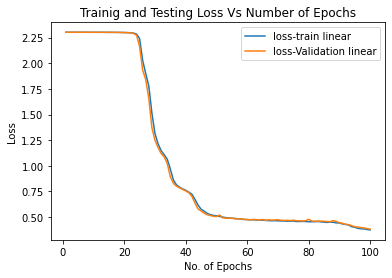

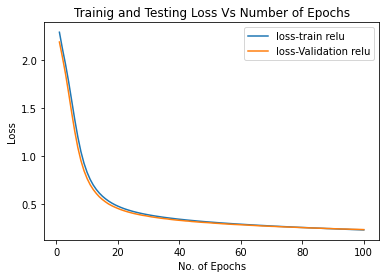

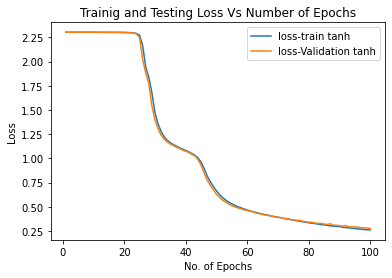

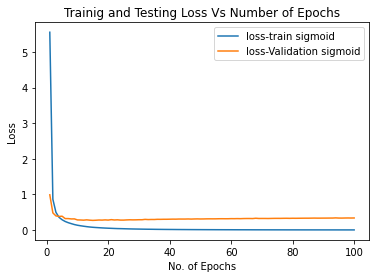

In [ ]:
plt.plot(np.arange(1,NN_linear.num_epochs+1),NN_linear.Train_loss,label='loss-train '+'linear')
plt.plot(np.arange(1,NN_linear.num_epochs+1),NN_linear.Test_loss,label='loss-Validation '+'linear') 
plt.xlabel("No. of Epochs") 
plt.ylabel("Loss")
plt.title('Trainig and Testing Loss Vs Number of Epochs')
plt.legend()
plt.show()

plt.plot(np.arange(1,NN_relu.num_epochs+1),NN_relu.Train_loss,label='loss-train '+'relu')
plt.plot(np.arange(1,NN_relu.num_epochs+1),NN_relu.Test_loss,label='loss-Validation '+'relu')  
plt.legend()
plt.xlabel("No. of Epochs") 
plt.ylabel("Loss")
plt.title('Trainig and Testing Loss Vs Number of Epochs')
plt.show()

plt.plot(np.arange(1,NN_tanh.num_epochs+1),NN_tanh.Train_loss,label='loss-train '+'tanh')
plt.plot(np.arange(1,NN_tanh.num_epochs+1),NN_tanh.Test_loss,label='loss-Validation '+'tanh')  
plt.legend()
plt.xlabel("No. of Epochs") 
plt.ylabel("Loss")
plt.title('Trainig and Testing Loss Vs Number of Epochs')
plt.show()

plt.plot(np.arange(1,NN_sigmoid.num_epochs+1),NN_sigmoid.Train_loss,label='loss-train '+'sigmoid')
plt.plot(np.arange(1,NN_sigmoid.num_epochs+1),NN_sigmoid.Test_loss,label='loss-Validation '+'sigmoid')  
plt.legend()
plt.xlabel("No. of Epochs") 
plt.ylabel("Loss")
plt.title('Trainig and Testing Loss Vs Number of Epochs')
plt.show()

In [ ]:
print(acc_arr)
print(max(acc_arr,key=acc_arr.get))

{'linear': 0.8928, 'tanh': 0.9257, 'sigmoid': 0.9346, 'relu': 0.9321}
sigmoid


In [ ]:
max_fn=max(acc_arr,key=acc_arr.get)
#print(max_fn)
filename=max_fn+'.sav'
#print(filename)
NN=pickle.load(open(filename, 'rb'))
"""
y_pred=NN.predict(X_test)
print(y_pred)
y_t=np.squeeze(np.eye(10)[y_pred.astype(np.int).reshape(-1)])
print(NN.Accuracy(y_t,y_test))
"""
input=X_train
for i in range(len(NN.weight_inits)-1):
  input=NN.sigmoid(input@NN.weights[i]+NN.bias[i])



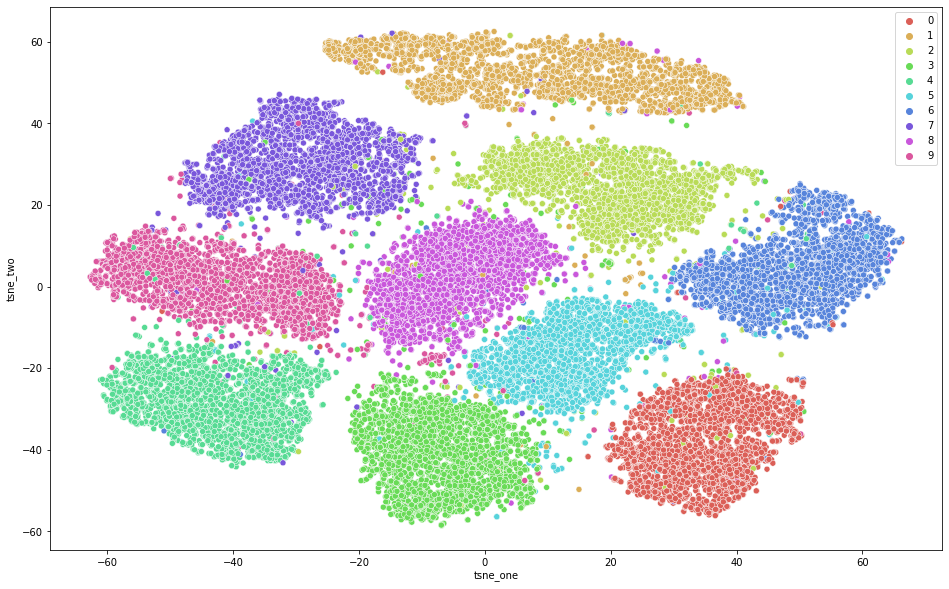

In [ ]:
"""TSNE Plot of final hidden Layer"""
tsne=TSNE(n_components=2)
df=pd.DataFrame()
X_tsne=tsne.fit_transform(input)
perm=np.random.permutation(input.shape[0])
df['tsne_one']=X_tsne[perm,0]
df['tsne_two']=X_tsne[perm,1]
plt.figure(figsize=(16,10))
sns.scatterplot(x="tsne_one", y="tsne_two",hue=y_train.ravel()[perm],palette=sns.color_palette("hls", 10),data=df,legend="full",alpha=1.0)


In [ ]:
"""Inbuilt model Implemeneted using Linear Activation function"""
clf = MLPClassifier(hidden_layer_sizes=(256,128,64), random_state=1,batch_size=1000,activation='identity',learning_rate_init=0.1,learning_rate='constant',max_iter=100,alpha=0)
clf.fit(X_train, y_train)
a=clf.score(X_test,y_test1)
print(a)

0.9136


In [ ]:
"""Inbuilt model Implemeneted using relu Activation function"""
mlp = MLPClassifier(hidden_layer_sizes=(256,128,64), random_state=1,batch_size=1000,activation='relu',learning_rate_init=0.1,learning_rate='constant',max_iter=100,solver='sgd',alpha=1)
mlp.fit(X_train, y_train)
print(mlp.score(X_test,y_test1))

0.954


In [ ]:
"""Inbuilt model Implemeneted using tanh Activation function"""
mlp = MLPClassifier(hidden_layer_sizes=(256,128,64), random_state=1,batch_size=1000,activation='tanh',learning_rate_init=0.1,solver='sgd',learning_rate='constant',max_iter=100,alpha=1,momentum=1)
mlp.fit(X_train, y_train)
print(mlp.score(X_test,y_test1))

0.9294


In [ ]:
"""Inbuilt model Implemeneted using sigmoid Activation function"""
mlp = MLPClassifier(hidden_layer_sizes=(256,128,64), random_state=1,batch_size=1000,activation='logistic',learning_rate_init=0.1,solver='sgd',learning_rate='constant',max_iter=100,alpha=0,momentum=1)
mlp.fit(X_train, y_train)
print(mlp.score(X_test,y_test1))

0.9443
